#Thinkful Data Science Course
##Unit 4: Predicting the Future; 
##Lesson 5: Clustering
##Cluster Analysis

####Summary:

Now we're going to apply K-Means clustering to a data set from the UN on economic and demographic data for different countries. We'll also use some well-known techniques to find the right K to use.

Load the UN countries dataset.
Determine how many rows are in the dataset. Determine the number of non-null values present in each column.
Based on the number of non-null values, which columns do you think will be the best to try to cluster on?
Determine the data type of each column.
How many counries are present in the dataset?
We're going to see how lifeMale, lifeFemale and infantMortality cluster according to GDPperCapita, keeping in mind that we don't know in advance how many clusters there will be.
Before we cluster the dataset, we need to determine the ideal number of clusters. For this, we need numpy and scipy.

We're going to explore 1 to 10 clusters. Define a range K from 1 to 10.
Apply scipy.cluster.vq.kmeans 1 to 10 and determine the cluster centroids.
Calculate the distance between each point and each cluster centroid.
Determine the closest centroid for each point.
Calculate the average within-cluster sum of squares for each centroid.
When we cluster, we are effectively trying to minimize the Euclidian distance between a cluster centroid and the points in that cluster. Practically, we define our clusters based on what will minimize what's called the within-cluster sum of squares (WCSS) (since sum of squares is the squared Euclidian distance).

Plot the number of clusters against the average within-cluster sum of squares. At what number of clusters does the curve seem to "level out"?

Now we're going to the cluster the dataset. From the elbow plot we see that the largest drops in average within-cluster sum of squares occur from 1 to 2 and from 2 to 3 clusters. After that the drops are much smaller and decreasing. We pick 3 as the best number of clusters for this dataset.

Cluster the UN dataset using k-means clustering with 3 clusters.
Plot the results. What patterns stand out to you? What conclusions can you draw?

In [90]:
import pandas as pd
import numpy as np
from scipy.cluster.vq import kmeans, vq,  whiten
from pylab import plot,show,ylabel,xlabel,title
import collections

####Load the UN countries dataset.

In [4]:
UNdf = pd.read_csv('/Users/molliepettit/Desktop/Data Science/Thinkful/Projects/Unit4/un.csv')

In [7]:
UNdf

,country,region,tfr,contraception,educationMale,educationFemale,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
0,Afghanistan,Asia,6.90,NaN,NaN,NaN,45.0,46.0,154,2848,87.5,7.2,52.800,85.000
1,Albania,Europe,2.60,NaN,NaN,NaN,68.0,74.0,32,863,NaN,NaN,NaN,NaN
2,Algeria,Africa,3.81,52,11.1,9.9,67.5,70.3,44,1531,76.4,7.8,26.100,51.000
3,American.Samoa,Asia,NaN,NaN,NaN,NaN,68.0,73.0,11,NaN,58.8,42.4,0.264,0.360
4,Andorra,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Angola,Africa,6.69,NaN,NaN,NaN,44.9,48.1,124,355,NaN,NaN,NaN,NaN
6,Antigua,America,NaN,53,NaN,NaN,NaN,NaN,24,6966,74.4,56.2,NaN,NaN
7,Argentina,America,2.62,NaN,NaN,NaN,69.6,76.8,22,8055,76.2,41.3,3.800,3.800
8,Armenia,Europe,1.70,22,NaN,NaN,67.2,74.0,25,354,65.0,52.0,0.300,0.500
9,Australia,Oceania,1.89,76,16.3,16.1,75.4,81.2,6,20046,74.0,53.8,NaN,NaN


####Determine how many rows are in the dataset.

In [6]:
UNdf.shape

(207, 14)

There are 207 rows and 14 columns.

####Determine the number of non-null values present in each column. 

In [8]:
UNdf.count()

country                   207
region                    207
tfr                       197
contraception             144
educationMale              76
educationFemale            76
lifeMale                  196
lifeFemale                196
infantMortality           201
GDPperCapita              197
economicActivityMale      165
economicActivityFemale    165
illiteracyMale            160
illiteracyFemale          160
dtype: int64

####Based on the number of non-null values, which columns do you think will be the best to try to cluster on

"country" and "region" have the most non-null values, so we should try to cluster on these columns.

####Determine the data type of each column. 

In [9]:
UNdf.dtypes

country                    object
region                     object
tfr                       float64
contraception             float64
educationMale             float64
educationFemale           float64
lifeMale                  float64
lifeFemale                float64
infantMortality           float64
GDPperCapita              float64
economicActivityMale      float64
economicActivityFemale    float64
illiteracyMale            float64
illiteracyFemale          float64
dtype: object

####How many counries are present in the dataset?

In [21]:
len(pd.unique(UNdf['country'].values.ravel()))

207

Entered code above to make sure to count only unique listings. Turns out they were all unique, so the number is still 207.

####We're going to see how lifeMale, lifeFemale and infantMortality cluster according 
to GDPperCapita, keeping in mind that we don't know in advance how many clusters there will be. Before we cluster the dataset, we need to determine the ideal number of clusters. For this, we need numpy and scipy, which were imported at top.

We're going to explore 1 to 10 clusters. Define a range K from 1 to 10. Apply scipy.cluster.vq.kmeans 1 to 10 and determine the cluster centroids. Calculate the distance between each point and each cluster centroid. Determine the closest centroid for each point. Calculate the average within-cluster sum of squares for each centroid. When we cluster, we are effectively trying to minimize the Euclidian distance between a cluster centroid and the points in that cluster. Practically, we define our clusters based on what will minimize what's called the within-cluster sum of squares (WCSS) (since sum of squares is the squared Euclidian distance).

Retrieving appropriate columns:

In [23]:
lifemale = UNdf['lifeMale']
gdp = UNdf['GDPperCapita']
lifefemale = UNdf['lifeFemale']
infantmortality = UNdf['infantMortality']

Replacing NaN values with zero:

In [24]:
lifemale[np.isnan(lifemale)]  = 0
gdp[np.isnan(gdp)] = 0
lifefemale[np.isnan(lifefemale)] = 0
infantmortality[np.isnan(infantmortality)] = 0

/Users/molliepettit/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/molliepettit/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Users/molliepettit/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.

###Lifemale and gdp

Will create a data frame with the two columns:

In [27]:
d1 = {'gdp': gdp, 'lifemale': lifemale}
df1 = pd.DataFrame(d1)
cluster1 = df1.values

In [35]:
df1

,gdp,lifemale
0,2848,45.0
1,863,68.0
2,1531,67.5
3,0,68.0
4,0,0.0
5,355,44.9
6,6966,0.0
7,8055,69.6
8,354,67.2
9,20046,75.4


In [34]:
cluster1

array([[  3.09492300e-01,   2.62480761e+00],
       [  9.37822524e-02,   3.96637594e+00],
       [  1.66373845e-01,   3.93721141e+00],
       [  0.00000000e+00,   3.96637594e+00],
       [  0.00000000e+00,   0.00000000e+00],
       [  3.85778674e-02,   2.61897470e+00],
       [  7.56995562e-01,   0.00000000e+00],
       [  8.75337245e-01,   4.05970244e+00],
       [  3.84691974e-02,   3.91971270e+00],
       [  2.17839980e+00,   4.39801097e+00],
       [  3.15208344e+00,   4.29885157e+00],
       [  3.48830858e-02,   3.87888236e+00],
       [  1.36326577e+00,   4.11219859e+00],
       [  9.85963355e-01,   4.14719602e+00],
       [  3.04276137e-02,   3.38891827e+00],
       [  7.79490262e-01,   4.29301867e+00],
       [  1.08018029e-01,   3.75639133e+00],
       [  2.88866724e+00,   4.31051738e+00],
       [  2.79173356e-01,   4.28135286e+00],
       [  4.24899892e-02,   3.05644264e+00],
       [  1.80392281e-02,   3.00977939e+00],
       [  9.87810746e-02,   3.48807767e+00],
       [  

Must be called prior to passing an observation matrix to kmeans. Normalize a group of observations on a per feature basis

In [63]:
cluster1 = whiten(cluster1)
centroids1,dist1 = kmeans(cluster1,2)
idx1,idxdist1 = vq(cluster1,centroids1)

####Explanation of what is happening above:
####whiten()
whiten() acts to normalize a group of observations on a per feature basis.

Before running k-means, it is beneficial to rescale each feature dimension of the observation set with whitening. Each feature is divided by its standard deviation across all observations to give it unit variance.

http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.vq.whiten.html

####kmeans()
Provides routines for k-means clustering, generating code books from k-means models, and quantizing vectors by comparing them with centroids in a code book.

kmeans(obs, k_or_guess, iter=20, thresh=1e-05, check_finite=True)[source]

obs - Each row of the M by N array is an observation vector. The columns are the features seen during each observation. The features must be whitened first with the whiten function.

k_or_guess - The number of centroids to generate. A code is assigned to each centroid, which is also the row index of the centroid in the code_book matrix generated.
The initial k centroids are chosen by randomly selecting observations from the observation matrix. Alternatively, passing a k by N array specifies the initial k centroids.

iter - The number of times to run k-means, returning the codebook with the lowest distortion. This argument is ignored if initial centroids are specified with an array for the k_or_guess parameter. This parameter does not represent the number of iterations of the k-means algorithm.

thresh - Terminates the k-means algorithm if the change in distortion since the last k-means iteration is less than or equal to thresh.

check_finite - Whether to check that the input matrices contain only finite numbers. Disabling may give a performance gain, but may result in problems (crashes, non-termination) if the inputs do contain infinities or NaNs. Default: True

codebook - A k by N array of k centroids. The i’th centroid codebook[i] is represented with the code i. The centroids and codes generated represent the lowest distortion seen, not necessarily the globally minimal distortion.

distortion - The distortion between the observations passed and the centroids generated.

http://docs.scipy.org/doc/scipy/reference/cluster.vq.html
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

####vq()
Assign codes from a code book to observations.

vq(obs, code_book[, check_finite])

http://docs.scipy.org/doc/scipy/reference/cluster.vq.html

####Background Information for k-means:
The k-means algorithm takes as input the number of clusters to generate, k, and a set of observation vectors to cluster. It returns a set of centroids, one for each of the k clusters. An observation vector is classified with the cluster number or centroid index of the centroid closest to it.

A vector v belongs to cluster i if it is closer to centroid i than any other centroids. If v belongs to i, we say centroid i is the dominating centroid of v. The k-means algorithm tries to minimize distortion, which is defined as the sum of the squared distances between each observation vector and its dominating centroid. Each step of the k-means algorithm refines the choices of centroids to reduce distortion. The change in distortion is used as a stopping criterion: when the change is lower than a threshold, the k-means algorithm is not making sufficient progress and terminates. One can also define a maximum number of iterations.

Since vector quantization is a natural application for k-means, information theory terminology is often used. The centroid index or cluster index is also referred to as a “code” and the table mapping codes to centroids and vice versa is often referred as a “code book”. The result of k-means, a set of centroids, can be used to quantize vectors. Quantization aims to find an encoding of vectors that reduces the expected distortion.

All routines expect obs to be a M by N array where the rows are the observation vectors. The codebook is a k by N array where the i’th row is the centroid of code word i. The observation vectors and centroids have the same feature dimension.

As an example, suppose we wish to compress a 24-bit color image (each pixel is represented by one byte for red, one for blue, and one for green) before sending it over the web. By using a smaller 8-bit encoding, we can reduce the amount of data by two thirds. Ideally, the colors for each of the 256 possible 8-bit encoding values should be chosen to minimize distortion of the color. Running k-means with k=256 generates a code book of 256 codes, which fills up all possible 8-bit sequences. Instead of sending a 3-byte value for each pixel, the 8-bit centroid index (or code word) of the dominating centroid is transmitted. The code book is also sent over the wire so each 8-bit code can be translated back to a 24-bit pixel value representation. If the image of interest was of an ocean, we would expect many 24-bit blues to be represented by 8-bit codes. If it was an image of a human face, more flesh tone colors would be represented in the code book.

In [64]:
dist1

0.78031267155331718

In [65]:
centroids1

array([[ 0.22048247,  3.38214793],
       [ 2.48756052,  4.08198713]])

In [66]:
idx1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [67]:
cluster1

array([[  3.09492300e-01,   2.62480761e+00],
       [  9.37822524e-02,   3.96637594e+00],
       [  1.66373845e-01,   3.93721141e+00],
       [  0.00000000e+00,   3.96637594e+00],
       [  0.00000000e+00,   0.00000000e+00],
       [  3.85778674e-02,   2.61897470e+00],
       [  7.56995562e-01,   0.00000000e+00],
       [  8.75337245e-01,   4.05970244e+00],
       [  3.84691974e-02,   3.91971270e+00],
       [  2.17839980e+00,   4.39801097e+00],
       [  3.15208344e+00,   4.29885157e+00],
       [  3.48830858e-02,   3.87888236e+00],
       [  1.36326577e+00,   4.11219859e+00],
       [  9.85963355e-01,   4.14719602e+00],
       [  3.04276137e-02,   3.38891827e+00],
       [  7.79490262e-01,   4.29301867e+00],
       [  1.08018029e-01,   3.75639133e+00],
       [  2.88866724e+00,   4.31051738e+00],
       [  2.79173356e-01,   4.28135286e+00],
       [  4.24899892e-02,   3.05644264e+00],
       [  1.80392281e-02,   3.00977939e+00],
       [  9.87810746e-02,   3.48807767e+00],
       [  

In [68]:
idxdist1

array([ 0.76255302,  0.59780876,  0.55769455,  0.62444767,  3.38932695,
        0.78455252,  3.42443731,  0.94229235,  0.56754269,  0.44209888,
        0.69901424,  0.53027561,  1.12470059,  1.08224746,  0.19017541,
        1.06872597,  0.39077663,  0.46164129,  0.90111826,  0.37116743,
        0.42384148,  0.1613454 ,  0.75463072,  0.55803245,  0.415327  ,
        0.70346021,  0.57524785,  0.77832556,  0.75466897,  0.37577032,
        0.25397923,  0.55803791,  0.45260084,  0.69906382,  0.71029842,
        0.88534624,  0.61628952,  0.59623684,  0.1895003 ,  0.55848603,
        0.64290865,  0.9660905 ,  0.62825681,  0.94588133,  1.28187607,
        0.73773021,  0.44177376,  1.13306502,  0.55541373,  3.38327089,
        0.63923558,  0.69966198,  0.54573124,  0.40820173,  0.49834959,
        0.586773  ,  0.55914503,  0.34786157,  0.59718182,  0.73843224,
        0.2445454 ,  0.47078261,  4.08257781,  0.33975432,  0.40533092,
        0.75711023,  0.52752193,  0.64016858,  0.7591948 ,  0.20

In [69]:
%matplotlib inline

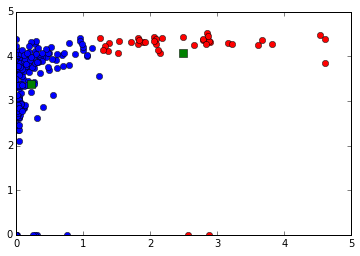

In [70]:
plot(cluster1[idx1==0,0],cluster1[idx1==0,1],'ob',
     cluster1[idx1==1,0],cluster1[idx1==1,1],'or')
plot(centroids1[:,0],centroids1[:,1],'sg',markersize=8)
show()

In [43]:
cluster1[idx1==0,0]

array([ 0.03042761,  0.09878107,  0.03988191,  0.04314201,  0.07889446,
        0.03966457,  0.11073478,  0.1081267 ,  0.07107021,  0.03596979,
        0.19169397,  0.05281364,  0.02336406,  0.17919691,  0.04162063,
        0.26069945,  0.02206002,  0.0547697 ,  0.11768966,  0.26635029,
        0.35100426,  0.1509427 ,  0.03488309,  0.07541701,  0.        ,
        0.07954648])

In [45]:
cluster1[idx1==0,1]

array([ 3.38891827,  3.48807767,  3.3247563 ,  3.27809306,  3.56390544,
        3.6222345 ,  3.69222937,  3.66306484,  3.38308536,  3.69806228,
        3.64556612,  3.34225502,  3.3247563 ,  3.44724733,  3.70389518,
        3.41224989,  3.35975374,  3.66889775,  3.33642212,  3.38308536,
        3.63390031,  3.36558665,  3.56973835,  3.70972809,  3.48807767,
        3.34808793])

In [46]:
cluster1[idx1==1,0]

array([ 2.55700625,  2.8764962 ])

In [47]:
cluster1[idx1==1,1]

array([ 0.,  0.])

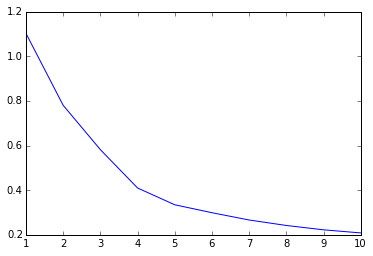

In [42]:
average_distance = []
for k in range(1,11):
    cluster1 = whiten(cluster1)
    centroids1,dist1 = kmeans(cluster1,k) # you can calculate the eucledean distance in the next line
    idx1,idxdist1 = vq(cluster1,centroids1)
    avg_dist = np.mean(idxdist1)
    average_distance.append(avg_dist)
# Just plotting the mean distance, you can plot Euclidian distance once you update the code
plot(range(1,11), average_distance)

In [82]:
cluster1 = whiten(cluster1)
centroids1,dist1 = kmeans(cluster1,4)
idx1,idxdist1 = vq(cluster1,centroids1)

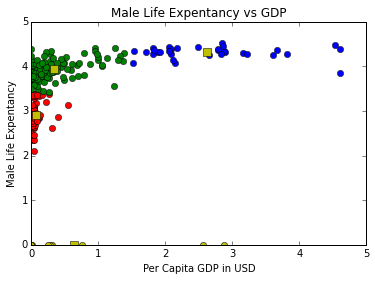

In [94]:
plot(cluster1[idx1==0,0],cluster1[idx1==0,1],'ob',
     cluster1[idx1==1,0],cluster1[idx1==1,1],'or',
     cluster1[idx1==2,0],cluster1[idx1==2,1],'og',
     cluster1[idx1==3,0],cluster1[idx1==3,1],'oy')
plot(centroids1[:,0],centroids1[:,1],'sy',markersize=8)
ylabel('Male Life Expentancy')
xlabel('Per Capita GDP in USD')
title('Male Life Expentancy vs GDP')
show()

###lifefemale vs GDP

In [98]:
d2 = {'gdp': gdp, 'lifefemale': lifefemale}
df2 = pd.DataFrame(d2)
cluster2 = df2.values

In [99]:
cluster2 = whiten(cluster2)
centroids2,dist2 = kmeans(cluster2,4)
idx2,idxdist2 = vq(cluster2,centroids2)

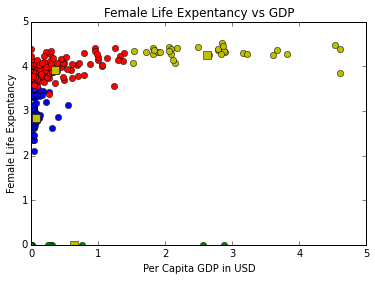

In [103]:
plot(cluster2[idx2==0,0],cluster1[idx2==0,1],'ob',
     cluster2[idx2==1,0],cluster1[idx2==1,1],'or',
     cluster2[idx2==2,0],cluster1[idx2==2,1],'og',
     cluster2[idx2==3,0],cluster1[idx2==3,1],'oy')
plot(centroids2[:,0],centroids2[:,1],'sy',markersize=8)
ylabel('Female Life Expentancy')
xlabel('Per Capita GDP in USD')
title('Female Life Expentancy vs GDP')
show()

In [101]:
d3 = {'gdp': gdp, 'infantmortality': infantmortality}
df3 = pd.DataFrame(d3)
cluster3 = df3.values

In [102]:
cluster3 = whiten(cluster3)
centroids3,dist3 = kmeans(cluster3,4)
idx3,idxdist3 = vq(cluster3,centroids3)

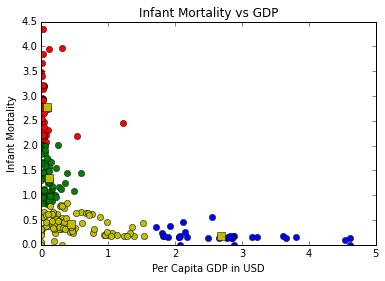

In [104]:
plot(cluster3[idx3==0,0],cluster3[idx3==0,1],'ob',
     cluster3[idx3==1,0],cluster3[idx3==1,1],'or',
     cluster3[idx3==2,0],cluster3[idx3==2,1],'og',
     cluster3[idx3==3,0],cluster3[idx3==3,1],'oy')
plot(centroids3[:,0],centroids3[:,1],'sy',markersize=8)
ylabel('Infant Mortality')
xlabel('Per Capita GDP in USD')
title('Infant Mortality vs GDP')
show()